In [1]:
import pandas as pd
import numpy as ny
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
eda1 = pd.read_csv( 'C:/Users/sharu/Downloads/data_clean.csv' )

In [6]:
eda1.head()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2010,67,S
1,2,36.0,118.0,8.0,72,5,2,2010,72,C
2,3,12.0,149.0,12.6,74,5,3,2010,74,PS
3,4,18.0,313.0,11.5,62,5,4,2010,62,S
4,5,NaN,NaN,14.3,56,5,5,2010,56,S


In [7]:
eda1.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [8]:
eda1.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [9]:
eda1.iloc[-5:]

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
153,154,41.0,190.0,7.4,67,5,1,2010,67,C
154,155,30.0,193.0,6.9,70,9,26,2010,70,PS
155,156,NaN,145.0,13.2,77,9,27,2010,77,S
156,157,14.0,191.0,14.3,75,9,28,2010,75,S
157,158,18.0,131.0,8.0,76,9,29,2010,76,C


In [11]:
eda1.iloc[:,1:]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,67,5,1,2010,67,S
1,36.0,118.0,8.0,72,5,2,2010,72,C
2,12.0,149.0,12.6,74,5,3,2010,74,PS
3,18.0,313.0,11.5,62,5,4,2010,62,S
4,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,67,5,1,2010,67,C
154,30.0,193.0,6.9,70,9,26,2010,70,PS
155,NaN,145.0,13.2,77,9,27,2010,77,S
156,14.0,191.0,14.3,75,9,28,2010,75,S


In [13]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
eda=eda1.copy()

In [15]:
eda['Month']=pd.to_numeric(eda['Month'],errors='coerce')
eda['Temp C']=pd.to_numeric(eda['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
eda['Weather']=eda['Weather'].astype('category')           #data['Wind']=data['Wind'].astype('int64')

In [19]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  158 non-null    int64   
 1   Ozone       120 non-null    float64 
 2   Solar.R     151 non-null    float64 
 3   Wind        158 non-null    float64 
 4   Temp C      157 non-null    float64 
 5   Month       157 non-null    float64 
 6   Day         158 non-null    int64   
 7   Year        158 non-null    int64   
 8   Temp        158 non-null    int64   
 9   Weather     155 non-null    category
dtypes: category(1), float64(5), int64(4)
memory usage: 11.5 KB


In [20]:
edaz=eda.iloc[:,1:]

In [21]:
#Count of duplicated rows
edaz[edaz.duplicated()].shape

(1, 9)

In [22]:
edaz.dtypes

Ozone       float64
Solar.R     float64
Wind        float64
Temp C      float64
Month       float64
Day           int64
Year          int64
Temp          int64
Weather    category
dtype: object

In [23]:
edaz[edaz.duplicated()]

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,14.0,191.0,14.3,75.0,9.0,28,2010,75,S


In [24]:
eda_drop=edaz.drop_duplicates()

In [25]:
eda_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 157
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Ozone    119 non-null    float64 
 1   Solar.R  150 non-null    float64 
 2   Wind     157 non-null    float64 
 3   Temp C   156 non-null    float64 
 4   Month    156 non-null    float64 
 5   Day      157 non-null    int64   
 6   Year     157 non-null    int64   
 7   Temp     157 non-null    int64   
 8   Weather  154 non-null    category
dtypes: category(1), float64(5), int64(3)
memory usage: 11.3 KB


In [26]:
eda_drop_col=eda_drop.drop('Temp C',axis=1)  #drop column temp C

In [27]:
eda_drop_col

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [28]:
eda_drop_col_rename=eda_drop_col.rename({'Solar.R': 'Solar'}, axis=1)

In [29]:
eda_drop_col_rename

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


#Outlier Detection

<AxesSubplot:>

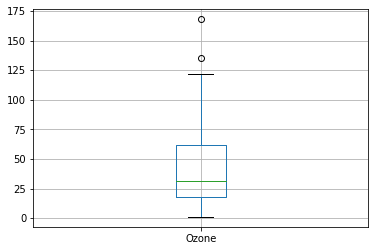

In [32]:
eda_drop_col_rename.boxplot(['Ozone'])

In [42]:
eda_drop_col_rename.max()

Ozone     168.0
Solar     334.0
Wind       20.7
Month       9.0
Day        31.0
Year     2010.0
Temp       97.0
dtype: float64